<h2 style="text-align: center">Доброе утро!</h2>


Наша задача на сегодня:
<h1>Построить кривую данных с ЭЭГ</h1>
<ul>
    <li>Считать данные с файла.</li>
    <li>Обработать сигнал методом возведения в квадрат</li>
    <li> Обработать сигнал методом возведения в модуль.</li>
    <li>Построить графики.</li>
</ul>


Здесь несколько вспомогательных методов: чтение данных из файла, запись в файл, а также генерирование случайных данных в файл.


In [115]:
from random import randint

def get_list_from_file(f_name):
    f = open(f_name, 'r')
    a = str(f.read()).split(' ')
    f.close()
    result = [int(item) for item in a]
    return result

def print_to_file(list_for_print, f_name):
    with open(f_name, 'w', encoding='UTF-8') as f:
        f.write(' '.join(map(str, list_for_print)))
        
def gen_value_file(n: int):
    random_list = []
    for i in range(n):
        random_list.append(randint(-100, 100))
    with open('random_value.txt', 'w', encoding='UTF-8') as f:
        f.write(' '.join(str(elem) for elem in random_list))

gen_value_file(100)
ylist = get_list_from_file('random_value.txt')
xlist = range(len(ylist))


Для начала просто строим точки, соответсвующие данным, считанным с файлов, не обрабатывая их.

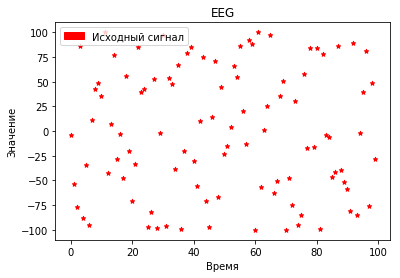

In [113]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


def f_plot(xlist, ylist, color=None):
    fig = plt.figure()
    plt.scatter(xlist, ylist, marker='*', s=20, color=color)
    plt.title('EEG')
    plt.ylabel('Значение')
    plt.xlabel('Время')
    patch = mpatches.Patch(color=color, label='Исходный сигнал')
    plt.legend(handles=[patch])
    
colors = ['red', 'green', 'blue']
f_plot(xlist, ylist, color=colors[0])
      
        

А теперь применяем метод абсолютных значений и строим график.


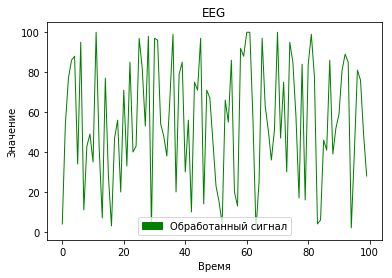

In [111]:
from math import fabs

def f_plot_line(xlist, ylist, color=None, linewidth=1):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(xlist, ylist, color=color, linewidth=linewidth)
    plt.title('EEG')
    plt.ylabel('Значение')
    plt.xlabel('Время')
    patch = mpatches.Patch(color=color, label='Обработанный сигнал')
    plt.legend(handles=[patch])

    
def get_abs_list(ylist):
    return [int(fabs(elem)) for elem in ylist]

f_plot_line(xlist, get_abs_list(ylist), color=colors[1])

Ну и метод вовзедения в квадрат.

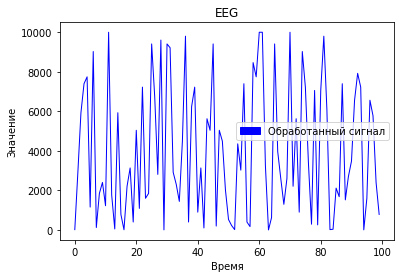

In [112]:
def get_sqr_list(ylist):
    return [elem*elem for elem in ylist]

f_plot_line(xlist, get_sqr_list(ylist), color=colors[2])

У меня все. Спасибо за внимания.